# Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


# Load dataset

In [2]:
df= pd.read_csv('StudentsPerformance.csv')
df.head(10) #first 10 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Exploratory Data Analysis

In [3]:
# missing value cheack
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing data in this dataset.

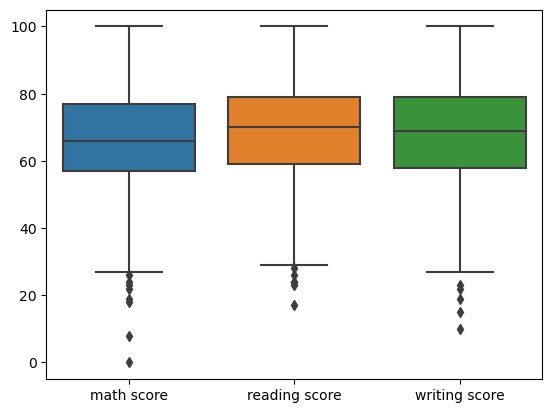

In [5]:
# Outlier Cheack
sns.boxplot(df)
plt.show()

Here, some data record characterized as Outlier.

In [6]:
# Handling Outlier
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df >= upper)[0]
lower_array = np.where(df <= lower)[0]

C:\Users\zihad\AppData\Local\Temp\ipykernel_10256\3455791220.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\zihad\AppData\Local\Temp\ipykernel_10256\3455791220.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
C:\Users\zihad\AppData\Local\Temp\ipykernel_10256\3455791220.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper_array = np.where(df >= upper)[0]
C:\Users\zihad\AppData\Local\Temp\ipykernel_10256\345

In [7]:
# Descriptive Statistics of Data
print("Description of Statistics of Data")
print(df.describe())
print("*"*100)
print("Basic information about Data")
print(df.info())

Description of Statistics of Data
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
****************************************************************************************************
Basic information about Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch    

# Data Visualization

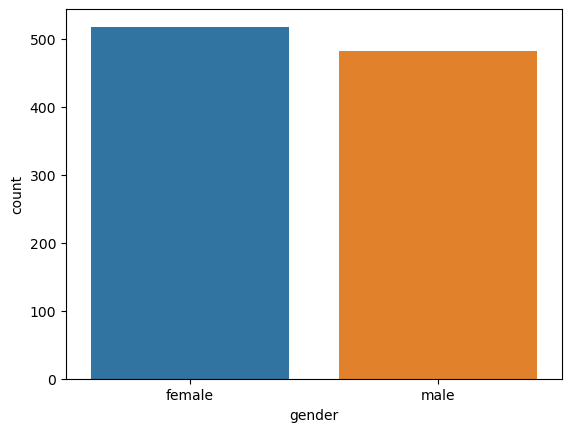

In [8]:
sns.countplot(x=df.gender,data=df)
plt.show()

The number of female students are higher than the number of male students.

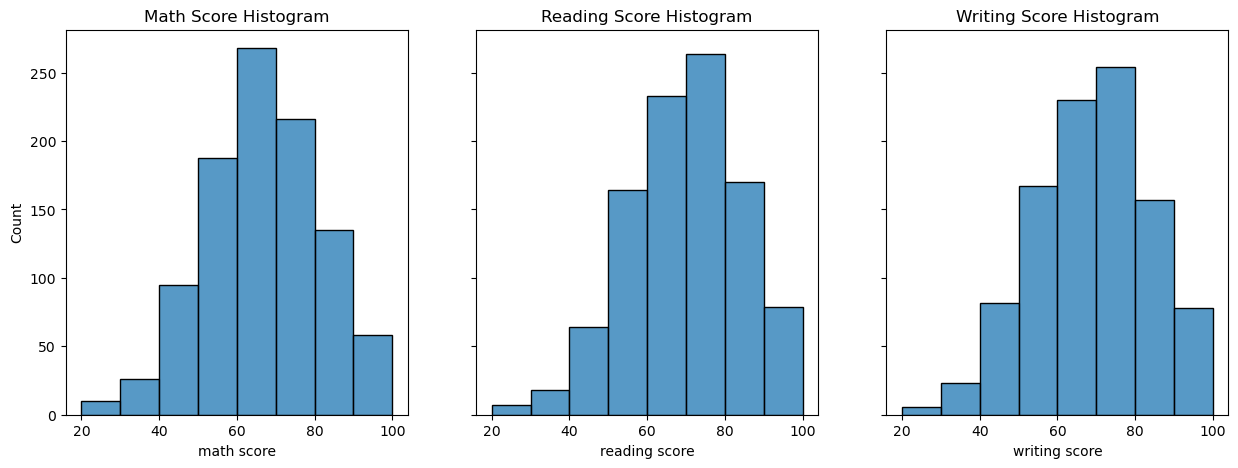

In [9]:
# Histogram for Math Score, Reading Score and Writing Score
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
sns.histplot(df['math score'],bins=[20,30,40,50,60,70,80,90,100],ax=ax[0])
ax[0].set_title("Math Score Histogram")
sns.histplot(df['reading score'],bins=[20,30,40,50,60,70,80,90,100],ax=ax[1])
ax[1].set_title("Reading Score Histogram")
sns.histplot(df['writing score'],bins=[20,30,40,50,60,70,80,90,100],ax=ax[2])
ax[2].set_title("Writing Score Histogram")
plt.show()


In [10]:
print("The average of Math Score", df.groupby('gender')['math score'].mean())
print("The average of Reading Score ",df.groupby('gender')['reading score'].mean())
print("The average of Writing Score",df.groupby('gender')['writing score'].mean())

The average of Math Score gender
female    63.633205
male      68.728216
Name: math score, dtype: float64
The average of Reading Score  gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64
The average of Writing Score gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64


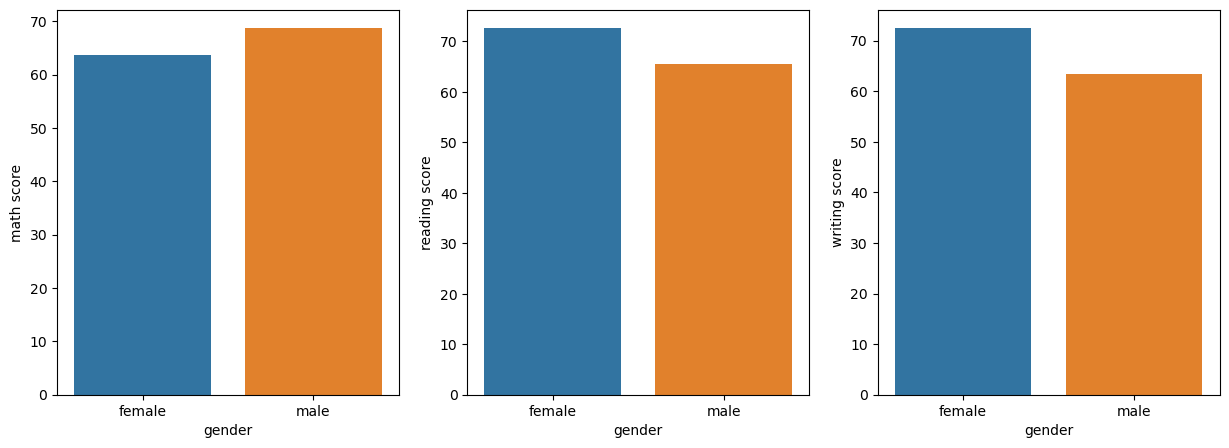

In [11]:
fig,ax=plt.subplots(1,3, figsize=(15,5))
sns.barplot(x='gender', y='math score',ax=ax[0], data=df.groupby('gender')['math score'].mean().reset_index())
sns.barplot(x='gender', y='reading score',ax=ax[1], data=df.groupby('gender')['reading score'].mean().reset_index())
sns.barplot(x='gender', y='writing score',ax=ax[2], data=df.groupby('gender')['writing score'].mean().reset_index())
plt.show()

The average of math score of male students is higher than female students, But average of reading socre and writing score of female students are higher than the male student's average socre.

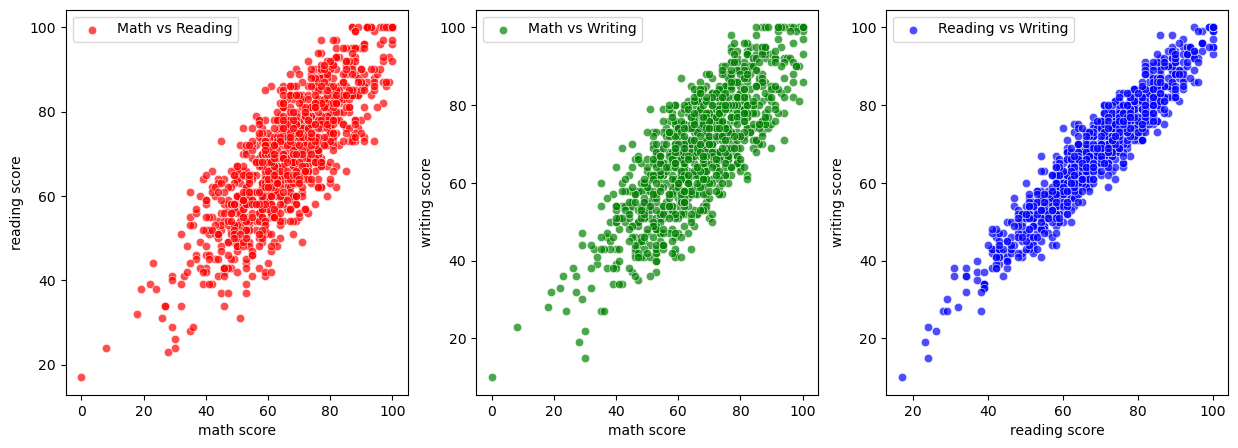

In [12]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x='math score', y='reading score', data=df, label='Math vs Reading', alpha=0.7,color='red',ax=ax[0])
sns.scatterplot(x='math score', y='writing score', data=df, label='Math vs Writing', alpha=0.7,color='green',ax=ax[1])
sns.scatterplot(x='reading score', y='writing score', data=df, label='Reading vs Writing', alpha=0.7,color='blue',ax=ax[2])
plt.show()

Reading vs Writing score has greater linear relationship than other two relationships.

# Hypothesis Testing

In [13]:
# Mean Score
print('The mean of math score ',df['math score'].mean())
print('The mean of reading score',df['reading score'].mean())
print('The mean of writing score ',df['writing score'].mean())

The mean of math score  66.089
The mean of reading score 69.169
The mean of writing score  68.054


In [14]:
# Median Score
print('The median of math score ',df['math score'].median())
print('The median of reading score',df['reading score'].median())
print('The median of writing score ',df['writing score'].median())

The median of math score  66.0
The median of reading score 70.0
The median of writing score  69.0


In [15]:
# Mode score
print('The mode of math score ',df['math score'].median())
print('The mode of reading score',df['reading score'].median())
print('The mode of writing score ',df['writing score'].median())

The mode of math score  66.0
The mode of reading score 70.0
The mode of writing score  69.0


In [ ]:
# Standard Deviation
print('The standard deviation of math score ',df['math score'].std())
print('The standard deviation of reading score',df['reading score'].std())
print('The standard deviation of writing score ',df['writing score'].std())

In [17]:
# math score
male_math_scores = df[df['gender'] == 'male']['math score']
female_math_scores = df[df['gender'] == 'female']['math score']

#reading score
male_reading_scores = df[df['gender'] == 'male']['reading score']
female_reading_scores = df[df['gender'] == 'female']['reading score']

#writing score
male_writing_scores = df[df['gender'] == 'male']['writing score']
female_writing_scores = df[df['gender'] == 'female']['writing score']

# Perform t-test 
math_t_stat, math_p_value = ttest_ind(male_math_scores, female_math_scores)
reading_t_stat, reading_p_value = ttest_ind(male_reading_scores, female_reading_scores)
writing_t_stat, writing_p_value = ttest_ind(male_writing_scores, female_writing_scores)


print(f'Test results for Math Scores: t-statistic = {math_t_stat}, p-value = {math_p_value}')
print(f'Test results for Reading Scores: t-statistic = {reading_t_stat}, p-value = {reading_p_value}')
print(f'Test results for Writing Scores: t-statistic = {writing_t_stat}, p-value = {writing_p_value}')


Test results for Math Scores: t-statistic = 5.383245869828983, p-value = 9.120185549328822e-08
Test results for Reading Scores: t-statistic = -7.959308005187657, p-value = 4.680538743933289e-15
Test results for Writing Scores: t-statistic = -9.979557910004507, p-value = 2.019877706867934e-22


In each case p-value less than 0.05 which incates that each one reject the null hypothesis. Here significant diffrence between malt student average and female students average.
For math score t-statistic is positive means that male students average scores is higher than the female students average scores. In case reading score and writing score female students have higher scores than male students score that's why t-statistic score is negative.

This analysis shows that male students are good at Math on the otherhand female students are good at Reading and Writing.